In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)

In [37]:
def loadData(file):
    fr = open(file)
    dataMat = []
    for line in fr.readlines():
        listOfArray = line.strip().split('\t')
        dataArray = []
        for data in listOfArray:
            dataArray.append(float(data))
        dataMat.append(dataArray)
    return np.array(dataMat)

def SumOfSquareError(center,  clusterMembers):
    SSE = np.linalg.norm(center - clusterMembers) 

def kmeans(data, k, iteration):
    centers = np.random.permutation(data)[:k]
    N, p = np.shape(data)
    for ite in range(iteration):
        M = np.zeros((N, k))  # store the belonging cluster for each data
        for i in range(N):  # compute the cloest distance for each data 
            idx = np.argmin([np.linalg.norm(data[i] - centers[j]) for j in range(k)])
            M[i, idx] = 1
            
        for i in range(k): # update the centers
            indices = np.nonzero(M[:,i])
            centers[i] = np.mean(data[indices], axis=0)
    return centers, M     

def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = np.sin(vecA[0,1]*np.pi/180) * np.sin(vecB[0,1]*np.pi/180)
    b = np.cos(vecA[0,1]*np.pi/180) * np.cos(vecB[0,1]*np.pi/180) * \
                      np.cos(np.pi * (vecB[0,0]-vecA[0,0]) /180)
    return np.arccos(a + b)*6371.0 #pi is imported with numpy

def clusterClubs(numClust=4):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = np.array(datList)
    centers, M = kmeans(datMat, numClust, 100)
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    colors = ["darkblue", "darkgreen", "orange", "darkred", "deeppink"]
    axprops = dict(xticks=[], yticks=[])
    fig = plt.figure()
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[np.nonzero(M[:,0]==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten(), ptsInCurrCluster[:,1].flatten(), marker=markerStyle, color=colors[i], s=90)
    ax1.scatter(centers[:,0].flatten(), centers[:,1].flatten(), marker='+', color='darkred', s=300)
    plt.show()


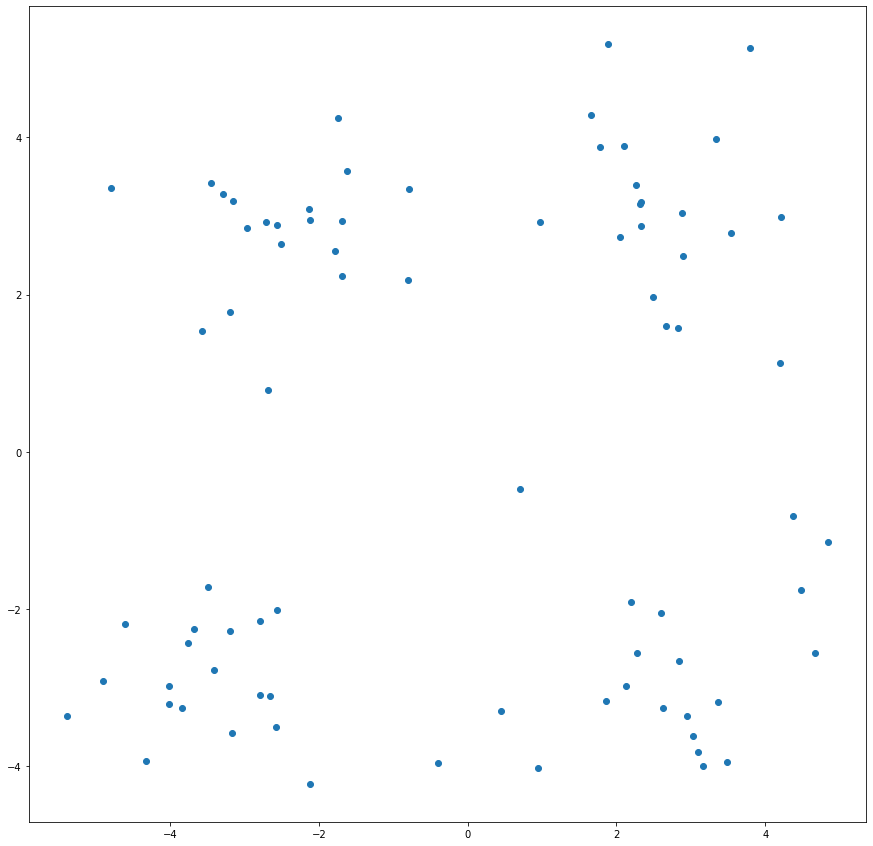

In [6]:
filename = 'testSet.txt'
datasets = loadData(filename)
plt.scatter(datasets[:, 0], datasets[:, 1])

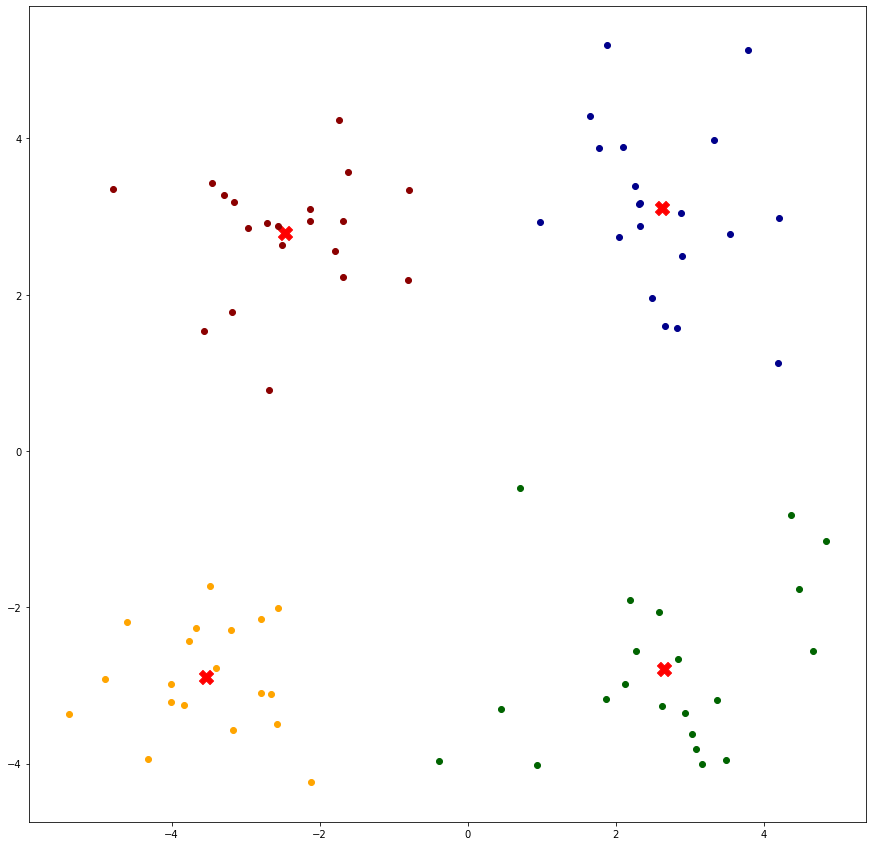

In [7]:
colors = ["darkblue", "darkgreen", "orange", "darkred", "deeppink"]
centers, M = kmeans(datasets, 4,  50)
plt.scatter(centers[:,0], centers[:,1], s=200, color="red", marker="X")
for i in range(M.shape[1]):
    idx = np.nonzero(M[:,i])
    group = datasets[idx]
    plt.scatter(group[:,0], group[:,1], color=colors[i])

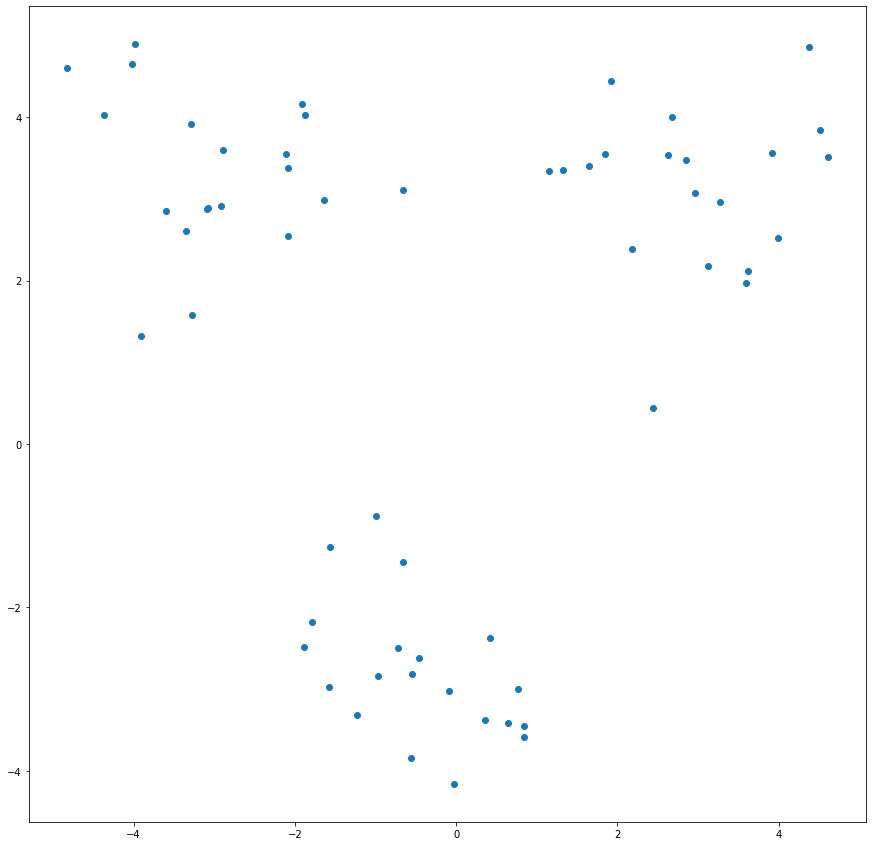

In [8]:
filename = 'testSet2.txt'
datasets = loadData(filename)
plt.scatter(datasets[:, 0], datasets[:, 1])

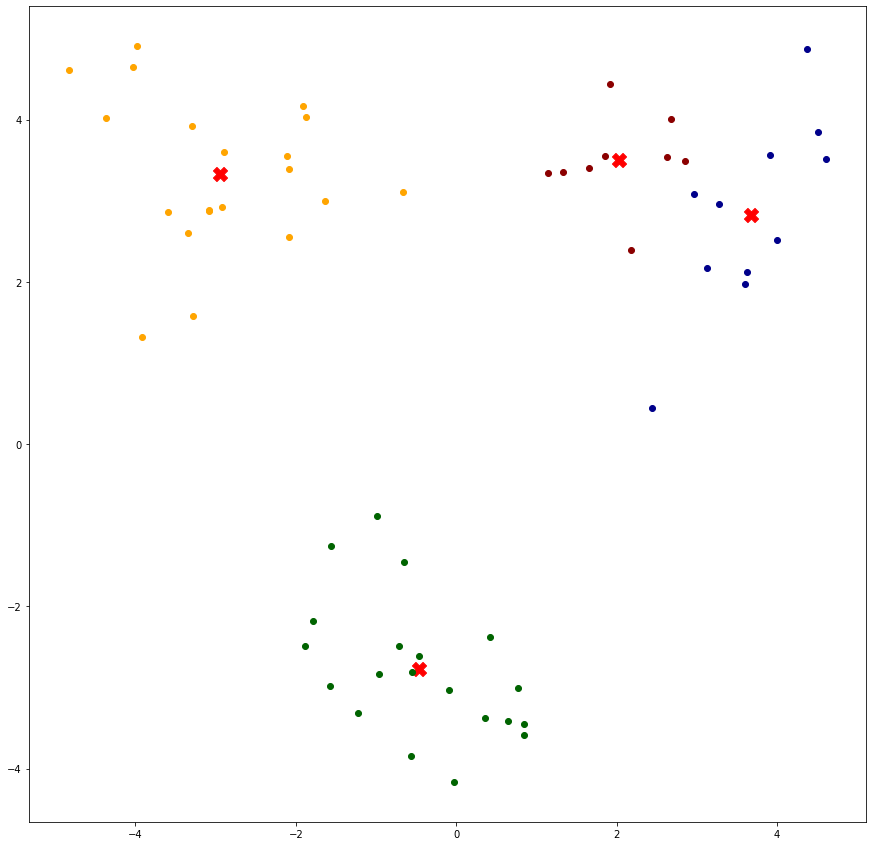

In [9]:
colors = ["darkblue", "darkgreen", "orange", "darkred", "deeppink"]
centers, M = kmeans(datasets, 4,  50)
plt.scatter(centers[:,0], centers[:,1], s=200, color="red", marker="X")
for i in range(M.shape[1]):
    idx = np.nonzero(M[:,i])
    group = datasets[idx]
    plt.scatter(group[:,0], group[:,1], color=colors[i])

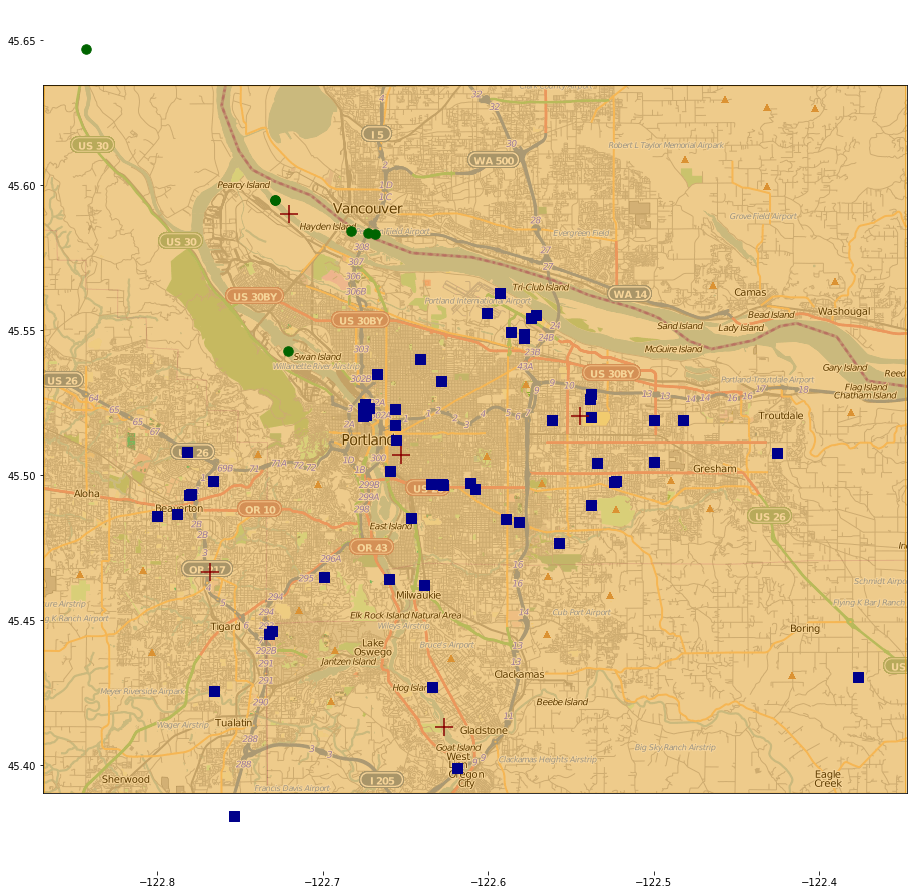

In [38]:
clusterClubs(5)